<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"> Lending Club Defaults Exploratory Analysis</h1>
<hr>

<span style="color:royalblue">Exploratory Analysis LendingClub Data Q1 2018</span>

<br><hr id="toc">

This workbook contains an initial analysis of Lending Club data 


[DataSet and Data Dictionary Examination](#data_cell)

[Initial Graphs](#initial_graphs)

[Delete Unwanted Data](#unwanted_data)

[Prepare Data for Analysis](#analysis_prep)


<br><hr>

### Import libraries and load the dataset.



In [131]:

from __future__ import print_function  

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")


various helper functions...

In [132]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
# This allows the machine learning algorithims to work on integers instead of strings
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]


<a id='data_cell'></a>
## 1.  Dataset and Data Dictionary Exploration
To speed up initial analysis I will only import the firt 10000 lines for the dataset.
* The file path is <code style="color:crimson">'project_files/LoanStats_2018Q1.csv'</code>

In [182]:
# Load excerpt of load stats from CSV
df = pd.read_csv('LendingClub_17_18_excerpt.csv', low_memory=False, nrows=10000)


This is the associated data dictionary describing the data features. Below the dictionary is combined with the dataset data types, first row values and information on data completeness. (Note that the data dictionary and dataset are indexed differently and so are joined on the shared feature column.)

In [183]:
data_dictionary = pd.read_excel('LCDataDictionary.xlsx').dropna()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'feature', 'Description': 'description'})

to_join_df = pd.DataFrame(df.dtypes,columns=['dtypes'])
to_join_df.reset_index(inplace=True)
to_join_df.rename(columns = {'index':'feature'}, inplace = True)
to_join_df["first_row"] = df.loc[0].values
to_join_df["%data_missing"] = (df.isnull().sum()/df.shape[0]*100).values

data_preview = to_join_df.merge(data_dictionary, on ='feature',how ='left')
display_all(data_preview.style.set_properties(subset=['description'], **{'width': '1000px'}))

,feature,dtypes,first_row,%data_missing,description
0,id,int64,124036600,0,A unique LC assigned ID for the loan listing.
1,member_id,float64,nan,100,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,14400,0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,14400,0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,14400,0,The total amount committed by investors for that loan at that point in time.
5,term,object,60 months,0,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,11.99,0,Interest Rate on the loan
7,installment,float64,320.25,0,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,0,LC assigned loan grade
9,sub_grade,object,B5,0,LC assigned loan subgrade


The table above shows that we have 151 columns with a number of columns containing a high percentage of missing data. We will remove some of these near empty columns plus some redundant columns.
These near-empty correspond to loans that have already been charged off and where a debt settlement company is involved. These columns will not add value to our analysis and can be dropped. Deleting/dropping these columns will bring us from 151 to 129 data columns.


In [15]:
df = df.loc[:, df.isnull().sum() < 0.99*df.shape[0]]
df.shape

(10000, 129)

<a id='initial_graphs'></a>

## 2. Initial Data Exploration



**Initial Graphs**

  * Loan Status Counts
  * Loan Amounts Distribution
  * Loan Purposes
  * Applicants occupations
  * Interest Rate Distribution
  * Geographical LoanSpread



**Loan status Review **

* Loans that are in "Default" are loans for which borrowers have failed to make payments for an extended period of time.
 
* A loan becomes “Charged Off” when there is no longer a reasonable expectation of further payments. Charge Off typically occurs when a loan is 120 days or more past due and there is no reasonable expectation of sufficient payment to prevent the charge off.

* Fully Paid. Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.

* Loan is past due but within the 15-day grace period. 

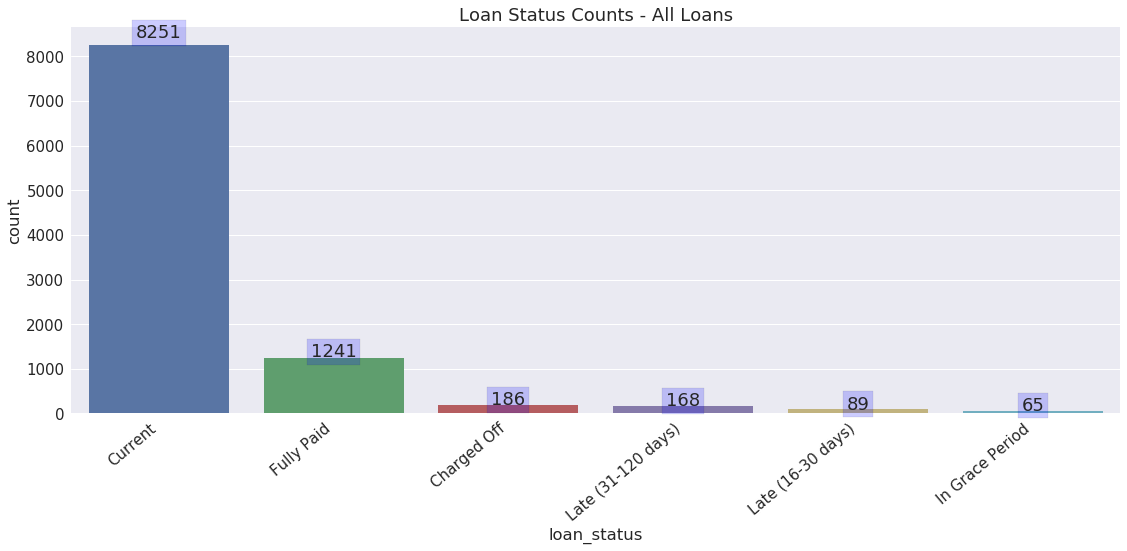

In [100]:
sns.set(font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches( 16, 8)    

ax = sns.countplot(x="loan_status", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Loan Status Counts - All Loans")

plt.tight_layout()

vals = df["loan_status"].value_counts()
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + height*.02,
            vals[idx], bbox=dict(facecolor='blue', alpha=0.2),
            ha="center")


In [113]:
#fig, axs = plt.subplots(1,2,figsize=(14,7))
#sns.countplot(x='loan_status',data=df,ax=axs[0])

#axs[0].set_title("Frequency of each Loan Status")


#df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
#axs[1].set_title("Percentage of each Loan status")
#plt.show()


In [101]:
df['loan_amnt'].describe()

count    10000.000000
mean     15268.390000
std       9869.143906
min       1000.000000
25%       8000.000000
50%      12500.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

Text(0.5,1,'Loan Amounts Distribution')

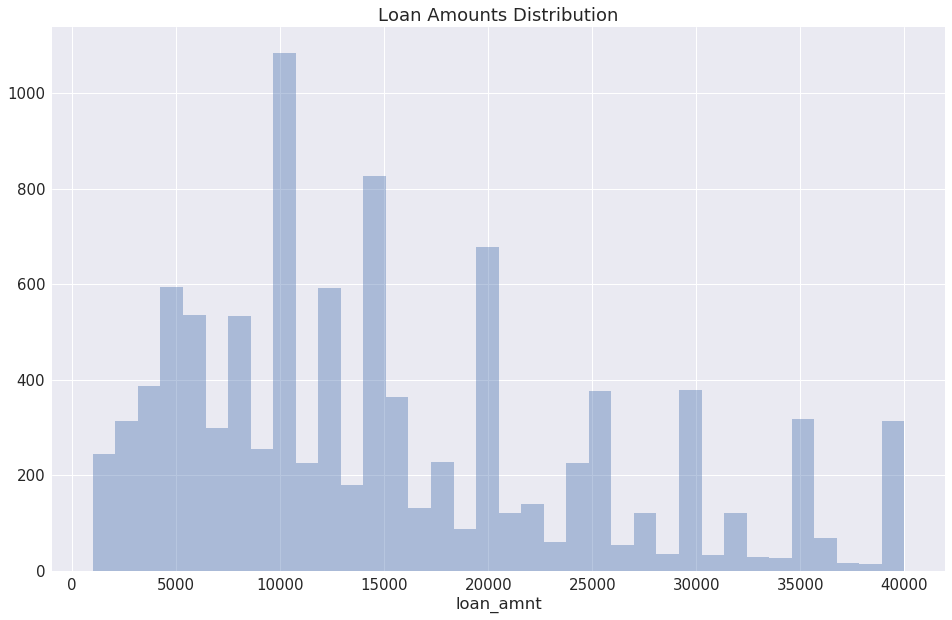

In [102]:
fig= plt.gcf()
fig.set_size_inches( 16, 10)
sns.distplot( a=df["loan_amnt"], hist=True, kde=False, rug=False ).set_title("Loan Amounts Distribution")

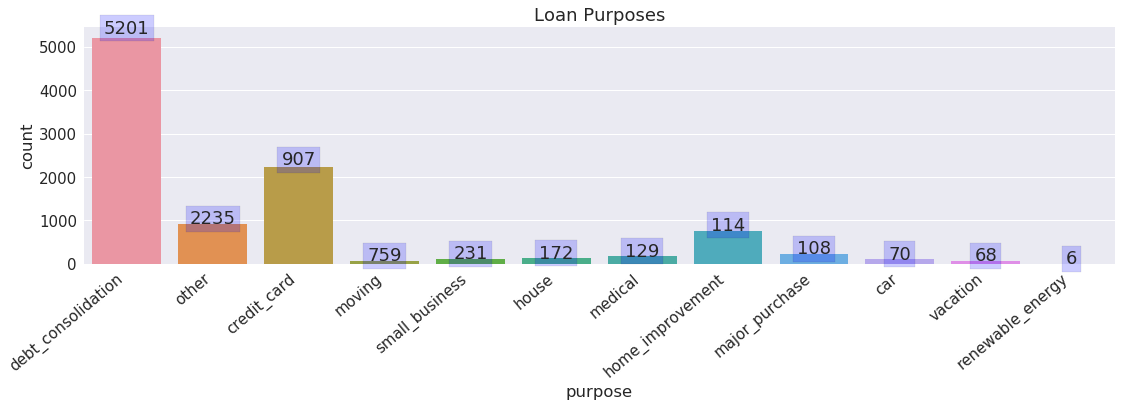

In [103]:

sns.set(font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches(16, 6)    


ax = sns.countplot(x="purpose", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Loan Purposes")

plt.tight_layout()
#plt.show()

#?ax.text
vals = df["purpose"].value_counts()
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + height*.02,
            vals[idx], bbox=dict(facecolor='blue', alpha=0.2),
            ha="center")


In [206]:
  
text = df["emp_title"].str.cat(sep=' ')
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=40, max_words=100, background_color="white").generate(text)
plt.figure(figsize=[16,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


KeyError: 'emp_title'

In [117]:
df["int_rate"].describe()

count    10000.000000
mean        12.855480
std          5.073692
min          5.320000
25%          9.440000
50%         11.990000
75%         16.020000
max         30.990000
Name: int_rate, dtype: float64

Text(0.5,1,'Loan Interest Rate Distribution')

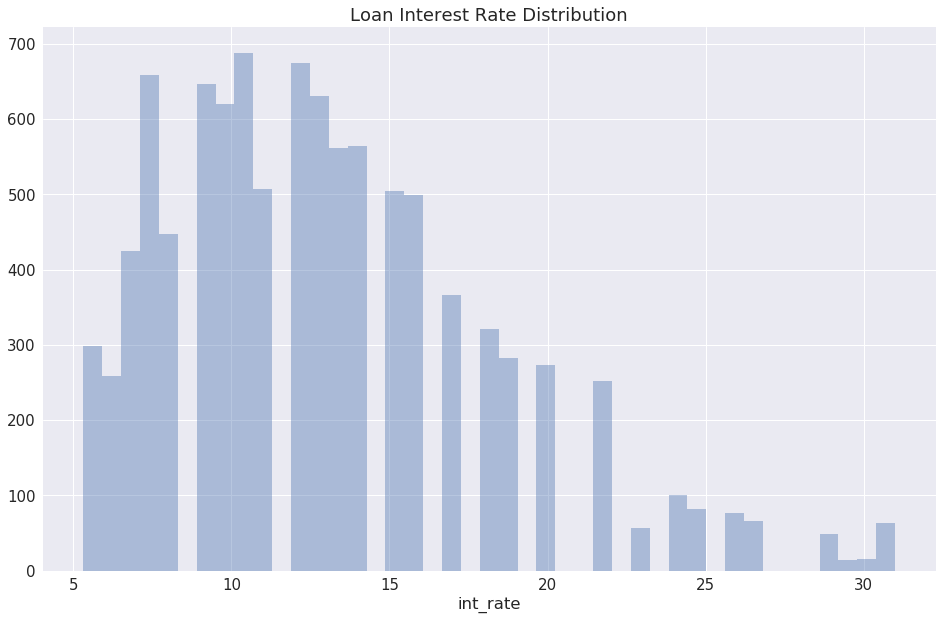

In [85]:
fig= plt.gcf()
fig.set_size_inches( 16, 10)
sns.distplot( a=df["int_rate"], hist=True, kde=False, rug=False ).set_title("Loan Interest Rate Distribution")

In [5]:
#df["addr_state"].nunique()
df["zip_code"].nunique()


778

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<a id='analysis_objectives'></a>

<a id='unwanted_data'></a>
## Delete Unwanted Data


In [186]:
df.shape

(10000, 151)

Our objective is to predict loan default using only the data we will have at the start of the lending process.
That is, we wish to prevent data leakage influencing our loan performance model.
Accordingly we will remove those features that would not be known when the loan application is being assessed. We also have features with a large amount of missing data. Those features that have more than 50% missing values are deleted. Finally there are features irrelevant to the loan application that are also removed. Note that these 3 classifications are not necessarily disjoint.

LendingClub ues the loan application and credit history of the applicant to assign a grade from A1-E5.
The grade therefore reflects the credit history and we can remove associated features. 
https://www.lendingclub.com/public/rates-and-fees.action
LendingClub also uses Fico Scores which analyse payment history for the applicant.
Finally LendingClub also uses a debt-to-income ratio https://www.lendingclub.com/loans/resource-center/calculating-debt-to-income.
 
It is probably safe to asume that these features subsume many of the credit history features remaining in the dataset. We begin by removing the features below. This reduces the number of features by 50% from the initial dataset for initial analysis.



| Data Leakage | Missing Data > 50% | Irrelevant |
| --- | --- | --- |
| last_pyment_d  |mths_since_last_delinq | url |
| next_pymnt_d| mths_since_last_record | policy_code|
| funded_amnt | mths_since_last_major_derog 	 | id|
| funded_amnt_inv | annual_inc_joint |emp_title|
|issue_d |dti_joint |purpose|
|pymnt_plan|verification_status_joint |desc|
|initial_list_status| mths_since_recent_bc_dlq|title|
|out_prncp|mths_since_recent_revol_delinq| int_rate|
|out_prncp_inv|revol_bal_joint|member_id|
|total_pymnt|sec_app_fico_range_low|acc_now_delinq| 	
|total_pymnt_inv|sec_app_fico_range_high|chargeoff_within_12_mths|
|total_rec_prncp|sec_app_earliest_cr_line |delinq_amnt|
|total_rec_int|sec_app_inq_last_6mths|||
|total_rec_late_fee|sec_app_mort_acc||
|recoveries|sec_app_open_acc|||
|collection_recovery_fee|sec_app_revol_util||
|last_pymnt_d|sec_app_open_act_il|||
|last_pymnt_amnt|sec_app_num_rev_accts|||
|last_credit_pull_d|sec_app_chargeoff_within_12_mths||
|last_fico_range_high|sec_app_mths_since_last_major_derog||
|last_fico_range_low| sec_app_collections_12_mths_ex_med||
|collections_12_mths_ex_med|||
|mths_since_last_major_derog||| 
|num_tl_120dpd_2m |||
|num_tl_30dpd |||
|hardship_flag |||
|hardship_type|||
|hardship_reason|||
|hardship_status|||
|deferral_term |||
|hardship_amount |||
|hardship_start_date |||
|hardship_end_date|||
|payment_plan_start_date |||
|hardship_length |||
|hardship_dpd |||
|hardship_loan_status |||
|hardship_last_payment_amount |||
| orig_projected_additional_accrued_interest |||
| hardship_payoff_balance_amount |||
| debt_settlement_flag |||
| debt_settlement_flag_date |||
| settlement_status |||
| settlement_date |||
| settlement_amount |||
| settlement_percentage |||
| settlement_term |||
| disbursement_method |||


In [187]:
#df = df.drop(['url', 'policy_code', 'last_pymnt_d', 'next_pymnt_d'], axis=1)
#df = df.drop(['funded_amnt', 'funded_amnt_inv', ], axis=1)
data_leakage = ['last_pyment_d','next_pymnt_d', 'funded_amnt', 'funded_amnt_inv', 'issue_d','pymnt_plan', \
               'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', \
               'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', \
               'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', \
               'num_tl_120dpd_2m', 'num_tl_30dpd', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', \
               'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', \
               'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', \
               'hardship_payoff_balance_amount', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', \
               'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term',\
               'hardship_last_payment_amount', 'disbursement_method']

df = df[df.columns.difference(data_leakage)]

missing_data = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', \
               'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', \
               'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', \
               'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',\
               'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', \
                'sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog']

df = df[df.columns.difference(missing_data)]

irrelevant_data = ['url', 'policy_code', 'id', 'emp_title', 'purpose', 'desc', 'title', 'int_rate', 'member_id', 'acc_now_delinq', \
                   'chargeoff_within_12_mths', 'delinq_amnt']
                   
#'acc_now_delinq','acc_open_past_24_mths', 'bc_open_to_buy', 'bc_util', ]

df = df[df.columns.difference(irrelevant_data)]

In [188]:
df.shape

(10000, 72)

In [159]:
display_all(df.head().T)

,4,17,30,31,47
acc_open_past_24mths,4,1,8,9,9
addr_state,TX,OH,CA,FL,CA
all_util,26,47,41,85,73
annual_inc,105000,115000,80000,90000,80000
application_type,Individual,Individual,Individual,Individual,Individual
avg_cur_bal,4711,18405,1982,23805,4020
bc_open_to_buy,10327,4248,23787,12374,10770
bc_util,54.7,21.3,41.4,42.4,11
delinq_2yrs,1,0,1,0,0
dti,6.17,3.94,27.05,25.42,21.54


Fico ranges can be calculated in various ways. We will use the average of the 2 fico ranges used by LendingClub.


In [189]:
df["fico_range_avg"] = (df["fico_range_high"] + df["fico_range_low"])/2
df.drop(["fico_range_high", "fico_range_low"], axis=1, inplace=True)


Individual    1248
Joint App      179
Name: application_type, dtype: int64
Fully Paid     1241
Charged Off     186
Name: loan_status, dtype: int64
 36 months    1064
 60 months     363
Name: term, dtype: int64


In [190]:
df.shape

(10000, 71)

<a id='analysis_prep'></a>
## Prepare Data for Analysis


The objective is to predict which loans are most likely to default.
The target variable will be loan_status. For this analysis we will only consider those loans that have been fuly paid or charged off. The majority of loans have a status of Current. We will ignore these a they do not help predict non-payment.

In [191]:
df = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]

In [192]:
df['loan_status'] = pd.get_dummies(df["loan_status"])

In [193]:
df["loan_status"].mean()

0.13034337771548704

### Missing_Values
A number of remaining columns have missing values. As mentioned above most of these columns are
subsumed in the LendingClud credit, dti and Fico scores. Therefore they will be removed - with the exception of emp_length. emp_length may be important and so we will reate an indicator variable to flag it missing where relevant.

In [213]:
display_all(df.isnull().sum()/df.shape[0]*100)  

acc_open_past_24mths          0.000000
addr_state                    0.000000
annual_inc                    0.000000
application_type              0.000000
delinq_2yrs                   0.000000
dti                           0.000000
earliest_cr_line              0.000000
emp_length                    9.670638
grade                         0.000000
home_ownership                0.000000
inq_fi                        0.000000
inq_last_12m                  0.000000
inq_last_6mths                0.000000
installment                   0.000000
loan_amnt                     0.000000
loan_status                   0.000000
max_bal_bc                    0.000000
mo_sin_old_rev_tl_op          0.000000
mo_sin_rcnt_rev_tl_op         0.000000
mo_sin_rcnt_tl                0.000000
mort_acc                      0.000000
num_accts_ever_120_pd         0.000000
num_actv_bc_tl                0.000000
num_actv_rev_tl               0.000000
num_bc_sats                   0.000000
num_bc_tl                

In [196]:
df.drop(["bc_open_to_buy", "bc_util", "il_util", "mo_sin_old_il_acct", "mths_since_rcnt_il", "mths_since_recent_bc", \
        "mths_since_recent_inq", "percent_bc_gt_75", "all_util", "avg_cur_bal", "revol_util" ], axis=1, inplace=True)

The following categorical features remain. 

In [231]:
df.select_dtypes(include=["object"]).iloc[0]

addr_state                       TX
application_type         Individual
earliest_cr_line           Oct-2000
emp_length                 < 1 year
grade                             D
home_ownership             MORTGAGE
sub_grade                        D3
term                      36 months
verification_status    Not Verified
zip_code                      780xx
Name: 4, dtype: object

In [234]:
df["zip_code"]

4       780xx
17      458xx
30      900xx
31      334xx
47      908xx
49      778xx
60      370xx
75      922xx
76      718xx
99      072xx
110     774xx
115     799xx
117     927xx
121     280xx
127     190xx
133     302xx
136     774xx
156     761xx
158     956xx
161     923xx
172     923xx
188     859xx
191     338xx
193     721xx
194     902xx
195     853xx
198     775xx
208     350xx
209     294xx
212     023xx
        ...  
9791    430xx
9795    330xx
9798    923xx
9804    850xx
9807    380xx
9810    100xx
9815    023xx
9828    925xx
9852    930xx
9853    103xx
9874    277xx
9875    327xx
9876    750xx
9891    981xx
9892    465xx
9899    920xx
9902    750xx
9918    660xx
9919    334xx
9921    086xx
9925    761xx
9927    494xx
9941    936xx
9949    864xx
9954    922xx
9965    920xx
9972    200xx
9988    071xx
9992    347xx
9999    336xx
Name: zip_code, Length: 1427, dtype: object